For whole recommendation system

A hybrid collaborative filtering, that combines the advantages of both the memory-based and the model-based methods. Most commercial recommender systems are hybrid. 

We are perpared to combine user based and the model based collaborative filtering in this file. Also, we will use the most hot several products to the new user

So, firstly import the other two collaborative ways

In [64]:
!pip install ipynb

In [65]:
from ipynb.fs.full.most_hot import *

In [66]:
from ipynb.fs.full.user_base import *

In [67]:
from ipynb.fs.full.model_method import *

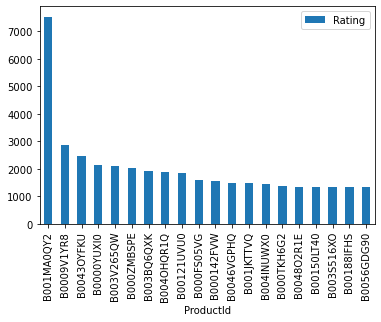

In [68]:
most_popular.head(20).plot(kind = "bar")

For the new user, we recommende most hot products to them

For others, we combine the memory-based and model-based method to recommende products

In [69]:
def hybridRecommendation(uid, userDic,itemDic,bcf, k = 10):
    # We know when k is 2 will get best result from pervious figure
    recommendList, neighbors = recommendation(uid, userDic, itemDic,k=7)

    pred_rating_result = [(iid, bcf.predict(uid,iid)) for iid in recommendList]
    pred_rating_result.sort(key = lambda x: x[1],reverse=True)
    recomList = [iid for iid, mark in pred_rating_result]
    
    if len(pred_rating_result) < k:
        return recomList, pred_rating_result
    else:
        return recomList[:k], pred_rating_result[:k]


In [70]:
def recall(testUsers, testUserDic, itemDic, userDic, recomMethod = hybridRecommendation, k = 10, bcf = None,trainset=None):
    """计算召回率"""
    hit = 0
    all_ = 0
    
    for userId in testUsers:
        if recomMethod == recommendation:
            recomList, neighbors = recomMethod(userId, userDic, itemDic,k=k)
        elif recomMethod == modelRecommendation: 
            recomList, recomListMark = recomMethod(bcf, userId, pd.unique(trainset["ProductId"]),k = k)
        elif recomMethod == hybridRecommendation: 
            recomList, neighbors = recomMethod(userId,userDic,itemDic, bcf,k = k)
        # recomList, recomListMark = recomMethod(userId,userDic,itemDic, bcf,k = k)
        # print("recomList", recomList)
        # print("testUserDic[userId]", testUserDic[userId])
        for tureItem, mark in testUserDic[userId]:
            if tureItem in recomList:
                hit += 1
        all_ += len(testUserDic[userId])
    return hit / (all_ * 1.)


In [71]:
def precision(testUsers, testUserDic, itemDic, userDic, recomMethod = hybridRecommendation, k = 10, bcf = None,trainset=None):
    """计算准确率"""
    hit = 0
    all_ = 0
    
    for userId in testUsers:
        if recomMethod == recommendation:
            recomList, neighbors = recomMethod(userId, userDic, itemDic,k=k)
        elif recomMethod == modelRecommendation: 
            recomList, recomListMark = recomMethod(bcf, userId, pd.unique(trainset["ProductId"]),k = k)
        elif recomMethod == hybridRecommendation: 
            recomList, neighbors = recomMethod(userId,userDic,itemDic, bcf,k = k)
        for reItem, mark in testUserDic[userId]:
            if reItem in recomList:
                hit += 1
        all_ += len(recomList)
    return hit / (all_ * 1.)

In [93]:
def f1_cal(recall, precision):
    return 2 * recall * precision / (recall + precision)

In [72]:
# def f1(testUsers, testUserDic, itemDic, userDic, recomMethod = hybridRecommendation, k = 10, bcf = None):
#     recall_value = recall(testUsers, testUserDic, itemDic, userDic, recomMethod,k=k,bcf=bcf)
#     precision_value = precision(testUsers, testUserDic, itemDic, userDic, recomMethod,k=k,bcf=bcf)
#     return 2 * recall_value * precision_value / (precision_value + recall_value)


In [73]:
# split the data to trainset and testset
trainset, testset = data_split(dataset[:100000], x=0.8)
# trainset, testset = data_split(dataset[:1000000], x=0.8)

Spliting data...
Data Splited!!!


In [74]:
#train the bcf
bcf = BaselineCFBySGD(trainset, 50, 0.034, 0.1, ["UserId", "ProductId", "Rating"])

In [75]:
#Generate the dic for training user and item
trainUserDic, trainItemDic = genUserDic(np.array(trainset))

In [76]:
#Generate the dic for test user and item
testUserDic, testItemDic = genUserDic(np.array(testset))

In [77]:
# Set up the test user id list
# In case, the error cause by the new test user id for the trainning model
listTestUsers = list(testUserDic.keys())
print(len(listTestUsers))
users =[]
for userId in listTestUsers:
    if userId in trainUserDic.keys():
        users.append(userId)
lista = users[:372]
len(lista)


405


218

In [78]:
recall_list = []
precision_list =[]
f1_list =[]
kv = []
for num in range(1,25):
    print(num)
    kv.append(num)
    recall_value = recall(lista,trainUserDic, trainItemDic, trainUserDic,k=num, bcf =bcf)
    recall_list.append(recall_value)

    precision_value = precision(lista,trainUserDic, trainItemDic, trainUserDic, k=num, bcf =bcf)
    precision_list.append(precision_value)

    f1_value = f1(lista,trainUserDic, trainItemDic, trainUserDic, k=num, bcf =bcf)
    f1_list.append(f1_value)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24


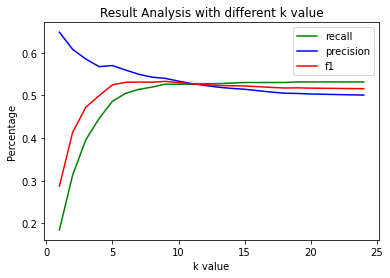

In [79]:
plt.title('Result Analysis with different k value')

plt.plot(kv, recall_list, color='green', label='recall')
plt.plot(kv, precision_list, color='blue', label='precision')
plt.plot(kv, f1_list,  color='red', label='f1')

plt.legend()
plt.xlabel('k value')
plt.ylabel('Percentage')
plt.show()

From the above frigue, we can know the line become to smooth at the k value 15

Then, we come to see the how many test user will get the best reults with k value 15

In [80]:
recall_list = []
precision_list =[]
f1_list =[]
kv = []

for num in range(1,370,10):
    print(num)
    kv.append(num)
    lista = users[:num]

    recall_value = recall(lista,trainUserDic, trainItemDic, trainUserDic,k=15, bcf =bcf)
    recall_list.append(recall_value)

    precision_value = precision(lista,trainUserDic, trainItemDic, trainUserDic, k=15, bcf =bcf)
    precision_list.append(precision_value)

    f1_value = f1(lista,trainUserDic, trainItemDic, trainUserDic, k=15, bcf =bcf)
    f1_list.append(f1_value)

1
11
21
31
41
51
61
71
81
91
101
111
121
131
141
151
161
171
181
191
201
211
221
231
241
251
261
271
281
291
301
311
321
331
341
351
361


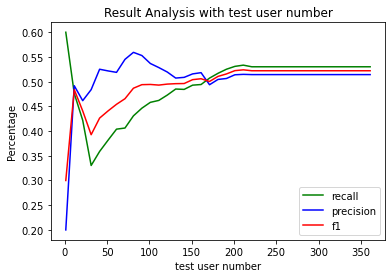

In [81]:
plt.title('Result Analysis with test user number')

plt.plot(kv, recall_list, color='green', label='recall')
plt.plot(kv, precision_list, color='blue', label='precision')
plt.plot(kv, f1_list,  color='red', label='f1')

plt.legend()
plt.xlabel('test user number')
plt.ylabel('Percentage')
plt.show()

In [190]:
dataCount = 100000
trainset, testset = data_split(dataset[:dataCount], x=0.8)
bcf = BaselineCFBySGD(trainset, 50, 0.034, 0.1, ["UserId", "ProductId", "Rating"])

Spliting data...
Data Splited!!!


In [191]:
UserDic, ItemDic = genUserDic(np.array(dataset[:dataCount]))
trainUserDic, trainItemDic = genUserDic(np.array(trainset))
testUserDic,testItemDic = genUserDic(np.array(testset))

In [192]:
listTestUsers = list(testUserDic.keys())
print(len(listTestUsers))
users =[]
for userId in listTestUsers:
    if userId in trainUserDic.keys():
        users.append(userId)
lista = users[:]
len(lista)

402


181

In [259]:
recall_list =[]
precision_list =[]
f1_value_list =[]

In [260]:
recall_value = recall(lista,UserDic, trainItemDic, trainUserDic, recomMethod=recommendation,k=10)
precision_value = precision(lista,UserDic, trainItemDic, trainUserDic,recomMethod=recommendation, k=10)
f1_value = f1_cal(recall_value,precision_value)

recall_list.append(recall_value)
precision_list.append(precision_value)
f1_value_list.append(f1_value)

# user_based = np.array([recall_value, precision_value, f1_value])
# user_based

In [261]:
recall_value = recall(lista,UserDic, trainItemDic, trainUserDic,recomMethod=modelRecommendation,k=1000, bcf =bcf,trainset=dataset[:dataCount])
precision_value = precision(lista,UserDic, trainItemDic, trainUserDic,recomMethod=modelRecommendation, k=1000,bcf=bcf,trainset=dataset[:dataCount])
f1_value = f1_cal(recall_value,precision_value)

recall_list.append(recall_value)
precision_list.append(precision_value)
f1_value_list.append(f1_value)

# model_based = np.array([recall_value, precision_value, f1_value])
# model_based

In [262]:
recall_value = recall(lista,trainUserDic, trainItemDic, trainUserDic,recomMethod=hybridRecommendation,k=15, bcf =bcf)
precision_value = precision(lista,trainUserDic, trainItemDic, trainUserDic,recomMethod=hybridRecommendation, k=15,bcf=bcf)
f1_value = f1_cal(recall_value,precision_value)

recall_list.append(recall_value)
precision_list.append(precision_value)
f1_value_list.append(f1_value)

# hybrid = np.array([recall_value, precision_value, f1_value])
# hybrid

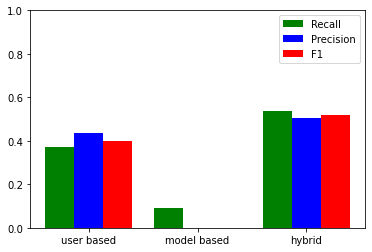

In [263]:
name_list = ['user based','model based','hybrid']
num_list = [1.5,0.6,7.8]
num_list1 = [1,2,3]
num2 = [5,5,5]
# x =list(range(len(num_list)))
# total_width, n = 0.8, 2
# width = total_width / n
 
x =list(range(len(recall_list)))
total_width, n = 0.8, 3
width = total_width / n
# print(recall_list)
# print(precision_list)
# f1_value_list
plt.bar(x, recall_list, width=width, label='Recall',fc = 'g')
for i in range(len(x)):
    x[i] = x[i] + width
plt.bar(x, precision_list, width=width, label='Precision',tick_label = name_list,fc = 'b')
for i in range(len(x)):
    x[i] = x[i] + width
plt.bar(x, f1_value_list, width=width, label='F1',fc = 'r')
plt.legend(loc='upper right')
plt.axis([None, None, 0, 1])
plt.show()